<a href="https://colab.research.google.com/github/serinss/seSAC_Python_Class/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_Preview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터분석에 자주 사용하는 문법 리뷰

#벡터
스칼라(scalar)는 크기만 가진 물리량, 벡터(vector)는 크기와 방향을 가진 물리량

#행렬
- 행렬 방정식 생성 가능  
x+2y=5  
2x+3y=8  
해당 연립 방정식의 해 (x,y)를 역행렬을 통해 계산할 수 있음 (아래 코드)  
- 역행렬
- 브로드캐스팅   
:벡터와 스칼라의 경우에는 관례적으로 다음처럼 1-벡터를 사용하여 스칼라를 벡터로 변환한 연산을 허용하는 것  
데이터 분석에서는 원래의 데이터 벡터 x가 아니라 그 데이터 벡터의 각 원소의 평균값을 뺀 평균제거(mean removed) 벡터 혹은 0-평균(zero-mean) 벡터를 사용하는 경우가 많다.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [61]:
a = np.array([[1,2],[2,3]])
b = np.array([[5],[8]])
ar = np.linalg.inv(a) #역행렬
answer = ar@b #행렬곱 : @ / 내적 : dot / 스칼라곱 : *
answer

array([[1.],
       [2.]])

#통계

In [7]:
heights = np.random.normal(174,10,size=10000)
hs = pd.Series(heights.round())
hs.value_counts()

177.0    403
172.0    400
175.0    398
176.0    396
173.0    395
        ... 
139.0      1
207.0      1
206.0      1
208.0      1
141.0      1
Length: 72, dtype: int64

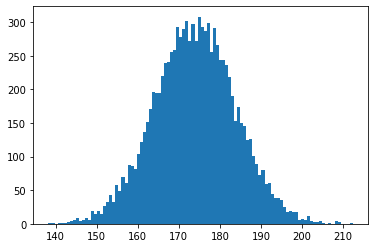

In [10]:
plt.hist(heights,bins=100)
plt.show()

#확률



###Q1.
1부터 6까지 쓰여진 6면체의 주사위가 있다.   
1이 나올 확률이 1/6  
2가 나올 확률이 1/12  
3이 나올 확률이 1/12  
4가 나올 확률이 1/3  
5가 나올 확률이 1/6  
6이 나올 확률이 1/6  
주사위를 100번 던지는 실험을 해 보세요.(단, 공평하지 않은 주사위)  


###A1.
0부터 11 사이의 랜덤한 수를 발생시킨다.  
발생한 수가 0,1 이면 주사위 1  
발생한 수가 2 이면 주사위 2  
발생한 수가 3 이면 주사위 3  
발생한 수가 4,5,6,7 이면 주사위 4  
발생한 수가 8,9 이면 주사위 5  
발생한 수가 10,11 이면 주사위 6  

In [13]:
data = np.random.randint(0,12,1000) #시도 횟수가 높아질수록, 각각의 확률에 근접한다
cnts = np.zeros(6)
for tv in data:
  if tv==0 or tv==1:
    cnts[0]+=1
  elif tv==2:
    cnts[1]+=1
  elif tv==3:
    cnts[2]+=1
  elif tv>=4 and tv<=7:
    cnts[3]+=1
  elif tv==8 or tv==9:
    cnts[4]+=1
  else:
    cnts[5]+=1
cnts

array([179.,  87.,  96., 311., 149., 178.])

#가설과 추론

현재는 2029년 Covid 이후에 전 세계에 새로운 전염병이 창궐  
바이러스의 이름은 eh, 초기 감염률 0.001  
sesac_medical에서는 테스터를 개발하여 발표하였는데  
양성인지 음성인지 판별하였을 때, 정확도가 99%라고 한다.  
해당 테스터는 유의미한 테스터인지 판별하시오.  

###거짓 양성과 거짓 음성
거짓 양성(false positive) 또는 1종 오류(type I error)는 통계상 실제로는 음성인데 검사 결과는 양성이라고 나오는 것이다. 예를 들어, 어떤 메일이 스팸 메일인지 검사하는 프로그램이 있다고 하자. 이때 어떤 메일이 실제로는 스팸 메일이 아니지만 프로그램 검사 결과 스팸 메일이라고 판정한다면, 이것이 거짓 양성이다. 위양성(僞陽性), 혹은 거짓 경보(false alarm)라고도 한다.

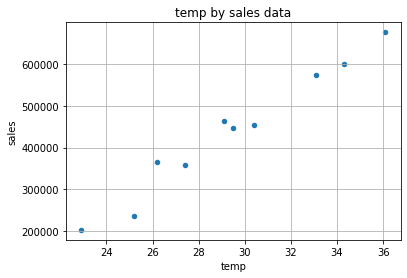

In [15]:
temperature = [25.2,27.4,22.9,26.2,29.5,33.1,30.4,36.1,34.3,29.1]
sales = [236500,357500,203500,365200,446600,574200,453200,675400,598400,463100]
dict_data = {'temp':temperature,"sales":sales}
df_sales = pd.DataFrame(dict_data, columns=['temp','sales'])
df_sales.plot.scatter(x='temp',y='sales',grid=True,title='temp by sales data')
plt.show()

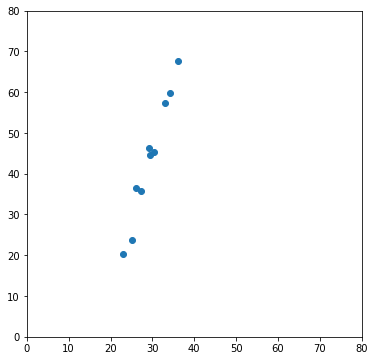

In [17]:
#선형 핵을 통해 직선의 방정식을 구하시오

#그래프 일대일 형태로 재정의
sales2 = np.array(sales)/10000 #10000으로 나눠서 근사치 구하기
dict_data2 = {'temp':temperature,"sales2":sales2}
df_sales2 = pd.DataFrame(dict_data2, columns=['temp','sales2'])
plt.figure(figsize=(6,6)) # 1-1
plt.plot(temperature,sales2,'o')
plt.xlim(0,80) 
plt.ylim(0,80) # 1-1
plt.show()

y = ax + b  
y = wx + b : 머신러닝에서 표현하는 방식  
- w (weight): 가중치 - 독립변수 x가 종속 변수 y에 영향을 주는 정도  
- b (bias): 편향 - 주어진 인자 외에 결과 y에 영향을 주는 정도

y = 3x - 5 (예측)  
y = 4x - 2 (예측2)  
y = 5x - 3 (예측3)  
y = 4x - 5 (예측4)  

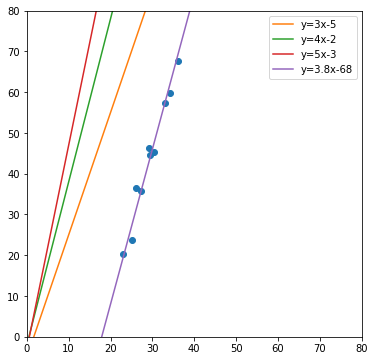

In [28]:
ales2 = np.array(sales)/10000 #10000으로 나눠서 근사치 구하기
dict_data2 = {'temp':temperature,"sales2":sales2}
df_sales2 = pd.DataFrame(dict_data2, columns=['temp','sales2'])
plt.figure(figsize=(6,6)) # 1-1
plt.plot(temperature,sales2,'o')
plt.plot([0,80],[3*0-5,3*80-5],'-',label='y=3x-5') 
plt.plot([0,80],[4*0-2,4*80-2],'-',label='y=4x-2') 
plt.plot([0,80],[5*0-3,5*80-3],'-',label='y=5x-3') 
plt.plot([0,80],[3.8*0-68,3.8*80-68],'-',label='y=3.8x-68') 
plt.ylim(0,80) # 1-1
plt.xlim(0,80) # 1-1
plt.legend()
plt.show()

###MSE
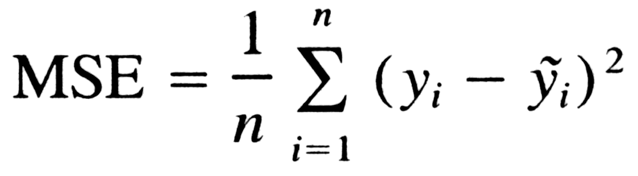

In [41]:
es1 = 0
es2 = 0
es3 = 0
es4 = 0
es5 = 0
for i,temp in enumerate(temperature):
  yp1 = 3*temp -5 #예측값
  yp2 = 4*temp -2 #예측값
  yp3 = 5*temp -3 #예측값
  yp4 = 4*temp -5 #예측값
  yp5 = 3.4*temp -55 #예측값
  y = sales2[i] #실제값
  es1 += abs(yp1-y) # 오차들의 합(대략적으로 비교) -> 가중치를 두는데 필요..
  es2 += abs(yp2-y) # mse 최적화된 오차를 구하는 방법
  es3 += abs(yp3-y)
  es4 += abs(yp4-y)
  es5 += abs(yp5-y)
print("오차1:", es1)
print("오차2:", es2)
print("오차3:", es3)
print("오차4:", es4)
print("오차5:", es5)

오차1: 395.23999999999995
오차2: 719.44
오차3: 1003.6400000000001
오차4: 689.44
오차5: 22.539999999999978


In [40]:
es1 = 0
es2 = 0
es3 = 0
es4 = 0
es5 = 0
for i,temp in enumerate(temperature):
  yp1 = 3*temp -5 #예측값
  yp2 = 4*temp -2 #예측값
  yp3 = 5*temp -3 #예측값
  yp4 = 4*temp -5 #예측값
  yp5 = 3.4*temp -55 #예측값
  y = sales2[i] #실제값
  es1 += (yp1-y)**2 # mean squered error
  es2 += (yp2-y)**2
  es3 += (yp3-y)**2
  es4 += (yp4-y)**2
  es5 += (yp5-y)**2
print("오차1:", es1)
print("오차2:", es2)
print("오차3:", es3)
print("오차4:", es4)
print("오차5:", es5)

오차1: 15739.029599999996
오차2: 51850.937600000005
오차3: 101110.48559999999
오차4: 47624.297600000005
오차5: 85.97359999999985


#선형 회귀
https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80  
선형 회귀(線型回歸, 영어: linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀(simple linear regression), 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다.

#로지스틱 회귀
https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80  
로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년[1]에 제안한 확률 모델로서 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법이다.  
= sigmoid function

In [53]:
#logistic function = sigmoid function
def sigmoid(x): 
  return math.exp(x)/(1+math.exp(x))

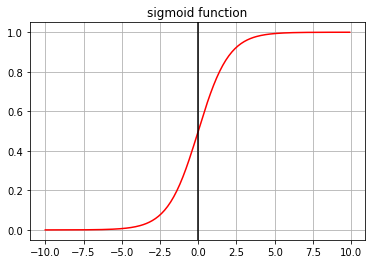

In [59]:
xs = [i/10 for i in range(-100,100,1)] # -10 ~ 10, 0.1
ys = [sigmoid(x) for x in xs]
plt.plot(xs,ys,'r-')
plt.axvline(x=0,color='k')
plt.title('sigmoid function')
plt.grid(True)
plt.show()

#KNN(최근접 이웃 알고리즘) & KMeans
https://ko.wikipedia.org/wiki/K-%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98  
k-최근접 이웃 알고리즘(또는 줄여서 k-NN)은 분류나 회귀에 사용되는 비모수 방식이다. 두 경우 모두 입력이 특징 공간 내 k개의 가장 가까운 훈련 데이터로 구성되어 있다. 출력은 k-NN이 분류로 사용되었는지 또는 회귀로 사용되었는지에 따라 다르다.

In [ ]:
temperature = [25.2,27.4,22.9,26.2,29.5,33.1,30.4,36.1,34.3,29.1]
sales = [236500,357500,203500,365200,446600,574200,453200,675400,598400,463100]
dict_data = {'temp':temperature,"sales":sales}
df_sales = pd.DataFrame(dict_data, columns=['temp','sales'])
df_sales.plot.scatter(x='temp',y='sales',grid=True,title='temp by sales data')
plt.show()

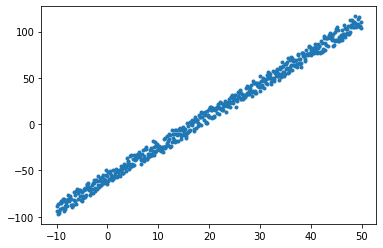

In [67]:
temps = np.array([temp/10 for temp in range(-100,500,1)])
sales = [3.4*temp - 55+np.random.randint(np.random.randint(-12,-7),np.random.randint(3,8)) for temp in temps]
plt.plot(temps,sales,'.') #점인데도 불구하고 직선으로 보인다 (600개 가량)
plt.show()
#yp5 = 3.4*temp -55

In [73]:
temp = 25
neighbors = [27.8,27.9,28,28.1,28.2] #28에 인접한 값들
n_sales = np.zeros(5)
for j,neighbor in enumerate(neighbors):
  for i,stemp in enumerate(temps):
    if neighbor == stemp:
      n_sales[j] = sales[i]
n_sales.mean() #28도일때, 판매량 평균

37.2

#리스케일링(Data Scaling)  
거리를 계산할 , 인자마다 편차가 존재  
그 편차값을 보정하기 위하여 사용  
https://soo-jjeong.tistory.com/122  
리스케일링 하면 평준화 및 편향보정돼서 머신러닝의 정확도가 높아진다

In [77]:
heights = np.random.normal(174,10,size=10000) #normal : 평균이 174,표준편차가 10인 정규분포 데이터 10000개를 생성
heights.mean(),heights.std()

(174.02029243377285, 10.106528266755127)

In [78]:
heights2 = heights-heights.mean() #평균값 빼기
heights2.mean(),heights2.std()

(1.3659473552252167e-14, 10.106528266755127)

In [79]:
heights3 = heights2/heights2.std() #표준편차로 나누어주기 -> 1.0
heights3.mean(),heights3.std()

(1.3507417406799504e-15, 1.0)

#퍼셉트론
퍼셉트론(Perceptron) 은 학습이 가능한 초창기 신경망 모델이다. 이후 노드, 가중치, 층과 같은 새로운 개념이 도입되었다. 주어진 데이터를 선형 분리할 수 있다면 미분을 활용한 알고리즘은 100% 정확률로 수렴할 수 있다는 것이 증명되었다.

딥러닝을 포함하여 현대 신경망은 퍼셉트론을 병렬 구조와 순차 구조로 결합한 형태이다. 즉, 퍼셉트론은 현대 신경망의 중요한 구성 요소이므로 구조와 동작, 학습 알고리즘, 특성을 제대로 이해할 필요가 있다.

#의사결정트리